In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from ipywidgets import interact

# Group velocity dispersion

In [6]:
# parameter values
sigma = 2
k0 = 4
w0, wp0, wpp0 = 4, 1.3, 2

# dispersion relation
w = lambda k: w0 + wp0 * (k - k0) + 0.5 * wpp0 * (k - k0)**2

# k-component in the plane wave expansion
Ek = lambda k: np.exp(-(k - k0)**2 / 2 * sigma**2)

# width and phase functions
Sigmat = lambda t: np.sqrt(np.sqrt(sigma**4 + wpp0**2 * t**2))
phit = lambda t: np.angle(sigma**2 + 1j * wpp0 * t)

In [7]:
ks, dk = np.linspace(k0 - 5 / sigma, k0 + 5 / sigma, 500, retstep=True)
x = np.linspace(-5 * sigma, 15 * sigma, 501)

def Ex_num(t):
    return sum(2 * Ek(k) * np.cos(k*x - w(k)*t) for k in ks) * dk

def Ex_ana(t):
    return 2 * np.real(
        np.sqrt(2 * np.pi) / Sigmat(t) * np.exp(-1j * phit(t)/2) *
        np.exp(-(x - wp0 * t)**2 / 2 / Sigmat(t)**2 * np.exp(-1j * phit(t))) *
        np.exp(1j * (k0 * x - w0 * t))
    )

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0), Output()), _dom_classes=('widget-inte…

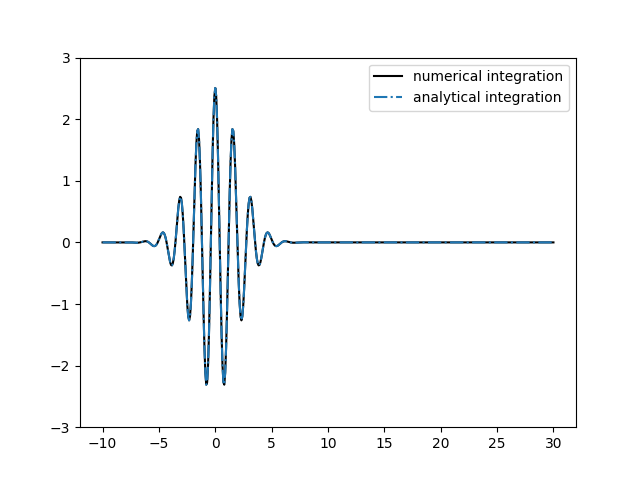

In [8]:
fig, ax = plt.subplots(1, 1)
line_num, = ax.plot(x, Ex_num(0), c="k", label="numerical integration")
line_ana, = ax.plot(x, Ex_ana(0), ls="-.", label="analytical integration")
ax.set_ylim(-3, 3)
ax.legend()

@interact(t=(0, 10, 0.1))
def time_evol(t=0):
    line_num.set_ydata(Ex_num(t))
    line_ana.set_ydata(Ex_ana(t))
# plt.plot(x, Ex_ana(10), "--")
# np.exp(-1j * phit(5))

# Anomalous dispersion Lorentz permittivity

In [4]:
# Lorentz/Drude model parameters
wp = 5
wT = 3
gamma = 0.5

epsilon = lambda w: 1 + wp**2 / (wT**2 - w**2 - 1j * gamma * w)

n = lambda w: np.sqrt(epsilon(w))

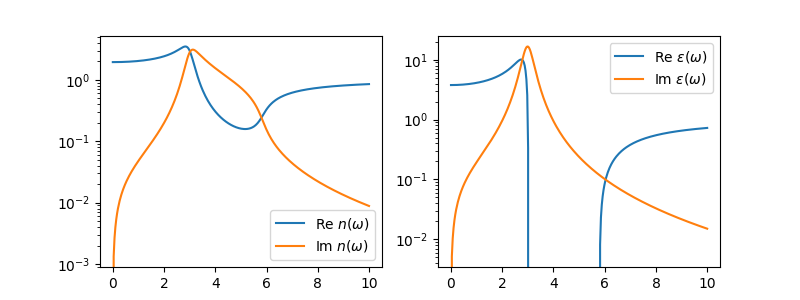

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

w = np.linspace(0, 10, 300)
axs[0].axhline(y=0, c="gray", ls="--")
axs[1].axhline(y=0, c="gray", ls="--")

axs[0].plot(w, n(w).real, label=r"$\text{Re}~n(\omega)$")
axs[0].plot(w, n(w).imag, label=r"$\text{Im}~n(\omega)$")
axs[1].plot(w, epsilon(w).real, label=r"$\text{Re}~\varepsilon(\omega)$")
axs[1].plot(w, epsilon(w).imag, label=r"$\text{Im}~\varepsilon(\omega)$")
axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[0].legend()
axs[1].legend()

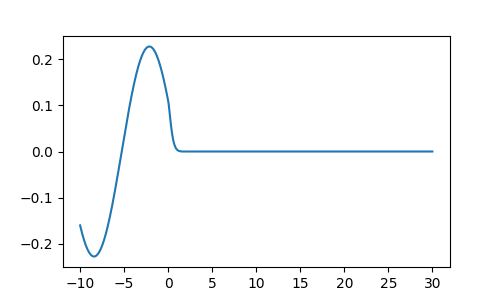

In [5]:
# refractive indices
n_neg = lambda w: 1
n_pos = lambda w: np.sqrt(epsilon(w))

# basic solutions
def f_wx(w, x):
    # negative region 
    f_neg = (np.exp(1j*(w * n_neg(w) * x)) 
            + (1 - n_pos(w)) / (1 + n_pos(w)) * np.exp(1j*(- w * n_neg(w) * x))
            ) * (x < 0)
    # positive region
    f_pos = 2 / (1 + n_pos(w)) * np.exp(1j*(w * n_pos(w) * x)) * (x >= 0)

    return f_neg + f_pos
    
# basic solution plot
x = np.linspace(-10, 30, 1000)
fig = plt.figure(figsize=(5, 3))
plt.plot(x, f_wx(0.5, x).real)

In [27]:
# wave packet parameters
sigma = 0.6
w0 = 3

# w-component in the plane wave expansion
Ew = lambda w: sigma * np.exp(-(w - w0)**2 / 2 / sigma**2)

# pulse
ws, dw = np.linspace(w0 - 3 * sigma, w0 + 3 * sigma, 400, retstep=True)
# ws, dw = [w0], 1
x = np.linspace(-10, 20, 701)

def Ex_num(t):
    return sum(Ew(w) * f_wx(w, x) * np.exp(-1j * w * t) for w in ws).real * dw

/tmp/ipykernel_113549/1263395697.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


interactive(children=(FloatSlider(value=-10.0, description='t', max=30.0, min=-10.0), Output()), _dom_classes=…

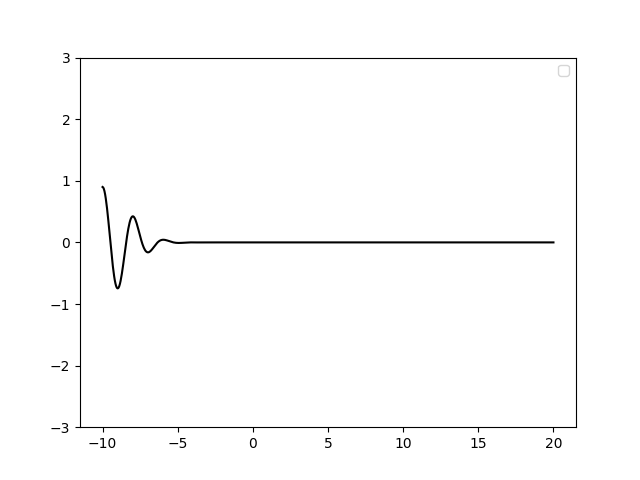

In [28]:
fig, ax = plt.subplots(1, 1)
line_num, = ax.plot(x, Ex_num(0), c="k")
ax.set_ylim(-3, 3)
ax.legend()

@interact(t=(-10, 30, 0.1))
def time_evol(t=-10):
    line_num.set_ydata(Ex_num(t))